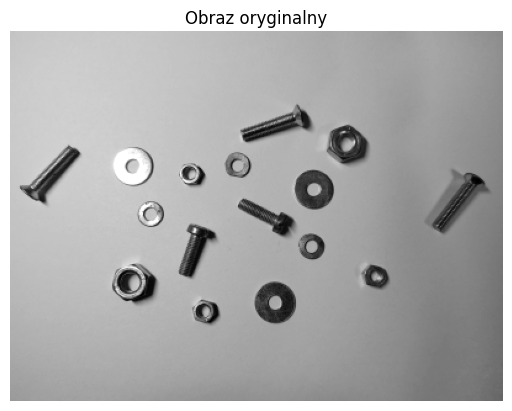

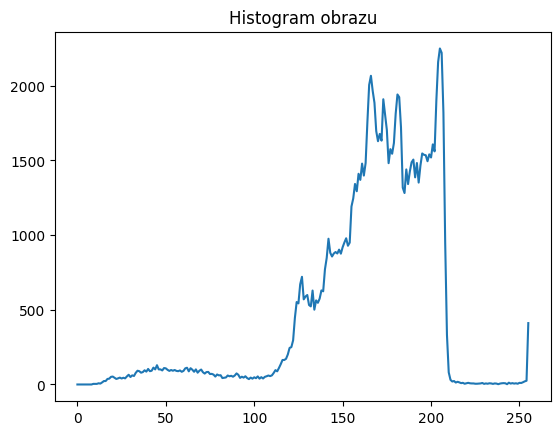

In [16]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

if not os.path.exists("details.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/details.png

I = cv2.imread('details.png',cv2.IMREAD_GRAYSCALE)
his = cv2.calcHist([I],[0],None,[256],[0,256])

plt.figure()
plt.imshow(I,'gray')
plt.title('Obraz oryginalny')
plt.axis('off')
plt.show()

plt.figure()
plt.plot(his)
plt.title('Histogram obrazu')
plt.show()

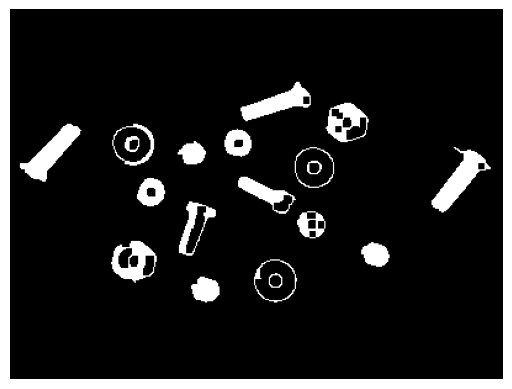

In [17]:
# I_filtered = cv2.equalizeHist(I)
# _,I_filtered = cv2.threshold(I_filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# I_filtered = cv2.adaptiveThreshold(I_filtered,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,5)
# I_filtered = cv2.medianBlur(I_filtered,7)

# I_bin1 = I < 110
# I_bin1 = I_bin1.astype(int)*255
# I_bin2 = 220 < I
# I_bin2 = I_bin2.astype(int)*255
# I_filtered = (I_bin1+I_bin2).astype('uint8')
# I_filtered = cv2.morphologyEx(I_filtered,cv2.MORPH_CLOSE,np.ones((2,2)),iterations=4)
I_filtered = cv2.Canny(I,130,220)
I_filtered = cv2.morphologyEx(I_filtered,cv2.MORPH_CLOSE,np.ones((5,5)),iterations=1)

plt.figure()
plt.imshow(I_filtered,'gray')
plt.axis('off')
plt.show()

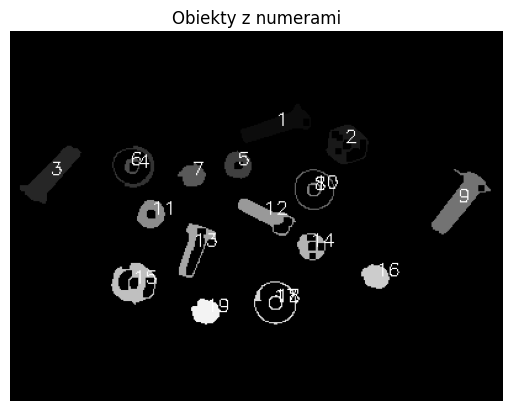

In [18]:
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(I_filtered)
labels_copy = np.copy(labels)
for s in range(1,len(np.unique(labels))):
    cv2.putText(labels_copy,str(s),(int(centroids[s,0]),int(centroids[s,1])),cv2.FONT_HERSHEY_SIMPLEX,0.5,(20,0,0),1)

HuMoments = []
for i in range(1,len(np.unique(labels))):
    I = (labels==i)*1
    I = I.astype('uint8')
    moment = cv2.moments(I)
    Hu = cv2.HuMoments(moment)
    HuMoments.append(Hu)

plt.figure()
plt.title('Obiekty z numerami')
plt.imshow(labels_copy,'gray')
plt.axis('off')
plt.show()

Momenty dla śrub:
Śruba 1
[[ 3.78723186e-01]
 [ 1.09989123e-01]
 [ 1.87385343e-03]
 [ 5.42387153e-04]
 [ 5.46616699e-07]
 [ 1.79685315e-04]
 [-1.43212900e-08]]
Śruba 2
[[3.26516711e-01]
 [7.50387670e-02]
 [1.42353860e-03]
 [3.57993027e-04]
 [2.54116492e-07]
 [9.66743857e-05]
 [2.71441288e-08]]
Śruba 3
[[2.21189644e+00]
 [5.60129952e-03]
 [1.61497292e-02]
 [5.36296447e-03]
 [3.56798356e-05]
 [1.44391961e-04]
 [3.48996467e-05]]
Śruba 4
[[ 3.26741459e-01]
 [ 7.15504508e-02]
 [ 1.34324447e-03]
 [ 1.44306789e-04]
 [ 5.21689678e-08]
 [ 3.34875379e-05]
 [-3.62628652e-08]]
Śruba 5
[[ 2.02335234e-01]
 [ 3.37925341e-04]
 [ 5.74586795e-05]
 [ 6.90195115e-07]
 [-2.81911351e-12]
 [-1.16138344e-08]
 [ 3.30821850e-12]]


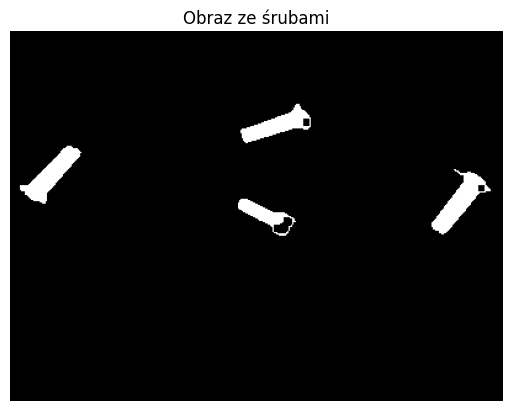

In [19]:
print('Momenty dla śrub:')
for idx,i in enumerate([0,2,7,8,10]):
    print('Śruba {}'.format(idx+1))
    print(HuMoments[i])

def get_screws(image):
    res = np.zeros(image.shape)
    _,image_labeled = cv2.connectedComponents(image)
    for i in range(1,len(np.unique(image_labeled))):
        I = (image_labeled==i)*1
        I = I.astype('uint8')
        moments = cv2.moments(I)
        Hu = cv2.HuMoments(moments)
        if  (2.82618591e-01 < Hu[0] < 4.11586215e-01) and not (1.53612098e-03 < Hu[1] < 6.38256932e-03):
            res += I
    return res

I1 = get_screws(I_filtered)
plt.figure()
plt.title('Obraz ze śrubami')
plt.imshow(I1,'gray')
plt.axis('off')
plt.show()

Momenty dla nakrętek:
Nakrętka 1
[[ 2.65774717e-01]
 [ 2.92007522e-03]
 [ 2.28554883e-04]
 [ 2.55063590e-04]
 [-6.15753473e-08]
 [-1.19508911e-05]
 [-1.03282514e-09]]
Nakrętka 2
[[5.42577411e-01]
 [1.41556072e-01]
 [4.32334743e-02]
 [9.23257707e-03]
 [1.31419239e-04]
 [2.61917190e-03]
 [1.29434404e-04]]
Nakrętka 3
[[ 3.40309793e-01]
 [ 2.80134263e-03]
 [ 7.55869475e-04]
 [ 1.56648420e-03]
 [-1.32527627e-06]
 [-8.28220137e-05]
 [ 1.07199322e-06]]
Nakrętka 4
[[1.63922275e-01]
 [1.28116665e-03]
 [1.14001386e-05]
 [5.29262176e-07]
 [1.24560565e-12]
 [1.83897244e-08]
 [3.72299158e-13]]
Nakrętka 5
[[ 2.68568630e-01]
 [ 1.01704331e-03]
 [ 6.11329481e-05]
 [ 3.68848620e-04]
 [ 3.02142680e-08]
 [ 5.40386158e-06]
 [-4.64203301e-08]]
Momenty dla podkładek:
Podkładka 1
[[ 9.97308193e-01]
 [ 1.25479715e-02]
 [ 1.66276765e-03]
 [ 6.64002495e-02]
 [ 6.63241808e-04]
 [-7.34308260e-03]
 [ 2.16562326e-04]]
Podkładka 2
[[ 5.16073054e-01]
 [ 3.46478987e-03]
 [ 6.17833992e-04]
 [ 8.75367871e-04]
 [-6.39338

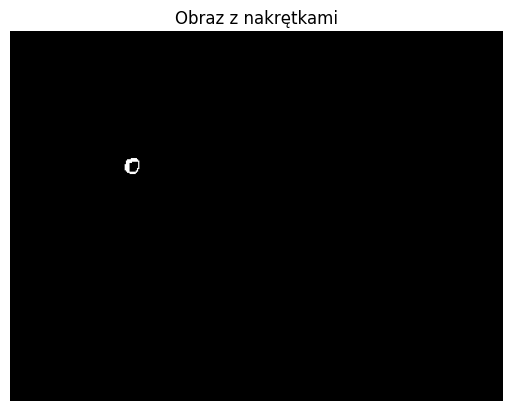

In [20]:
template_nuts = 0
print('Momenty dla nakrętek:')
for idx,i in enumerate([1,12,5,15,13]):
    print('Nakrętka {}'.format(idx+1))
    print(HuMoments[i])
    template_nuts += HuMoments[i]
template_nuts = template_nuts/len([1,12,5,15,13])

template_pads = 0
print('Momenty dla podkładek:')
for idx,i in enumerate([3,9,4,14,11,6]):
    print('Podkładka {}'.format(idx+1))
    print(HuMoments[i])
    template_pads += HuMoments[i]
template_pads = template_pads/len([3,9,4,14,11,6])

def get_nuts(image):
    res = np.zeros(image.shape)
    _,image_labeled = cv2.connectedComponents(image)
    for i in range(1,len(np.unique(image_labeled))):
        I = (image_labeled==i)*1
        I = I.astype('uint8')
        moments = cv2.moments(I)
        Hu = cv2.HuMoments(moments)
        likelihood_nuts = np.linalg.norm(Hu-template_nuts)
        likelihood_pads = np.linalg.norm(Hu-template_pads)
        if likelihood_nuts < 0.04:
            res += I
    return res

I2 = get_nuts(I_filtered)
plt.figure()
plt.title('Obraz z nakrętkami')
plt.imshow(I2,'gray')
plt.axis('off')
plt.show()

Niestety nie udało się wydzielić nakrętek od podkładek.